In [1]:
## DESENVOLVER UMA METODOLOGIA PARA PREVISÃO DO VALOR DO PLANO DE SAÚDE PARA SEUS BENEFICIÁRIOS

# 1 - Analise Exploratoria

In [2]:
#Importando Bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importando dataset
train_data = pd.read_csv('Train_Data.csv')
train_data.head()
#age - idade
#sex - genero
#bmi - IMC
#smoker - fumante
#region - local do pais onde mora
#children - filhos
#charges - valor que paga pelo plano

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [4]:
#Shape
train_data.shape

(3630, 7)

In [5]:
#Chegando se há valores nulos
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [6]:
#Insigths
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [7]:
#Descrição dos dados
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


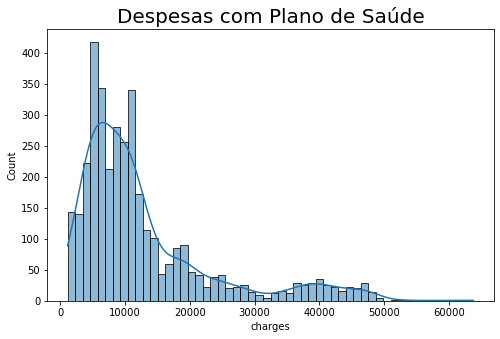

In [8]:
#Histograma dos Valores
plt.figure(figsize=(8,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


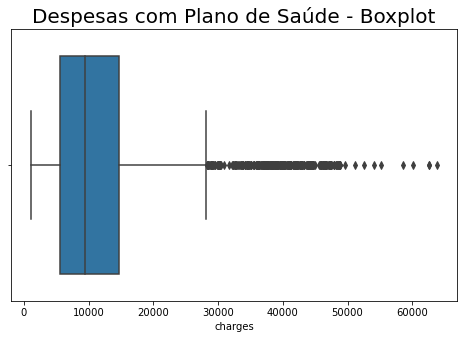

In [9]:
#Boxplot dos 'charges' para verificar outliers
plt.figure(figsize=(8,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde - Boxplot', fontsize=20)
plt.show()

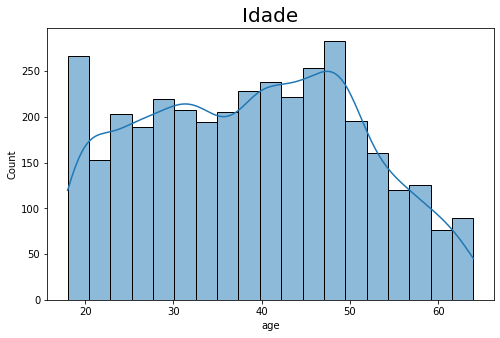

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


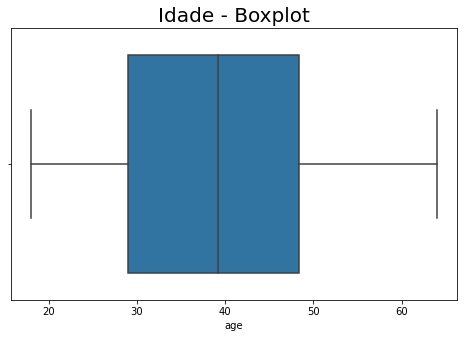

In [10]:
#Idades

#Histograma
plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

#Outliers - Idade
plt.figure(figsize=(8,5))
sns.boxplot(train_data['age'])
plt.title('Idade - Boxplot', fontsize=20)
plt.show()

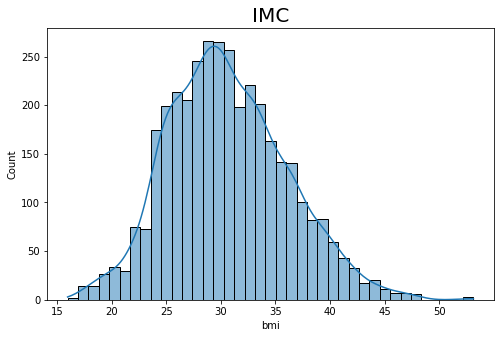

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


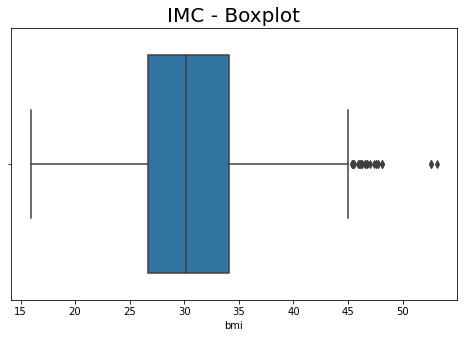

In [11]:
#IMC
#Histograma
plt.figure(figsize=(8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('IMC', fontsize=20)
plt.show()

#Outliers - Idade
plt.figure(figsize=(8,5))
sns.boxplot(train_data['bmi'])
plt.title('IMC - Boxplot', fontsize=20)
plt.show()


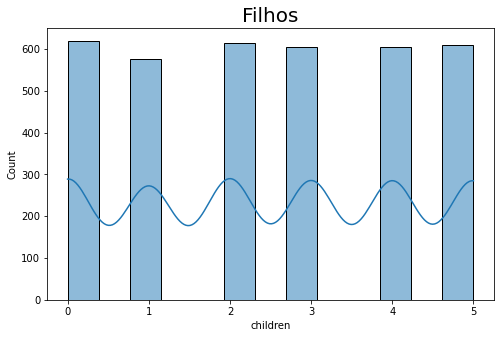

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


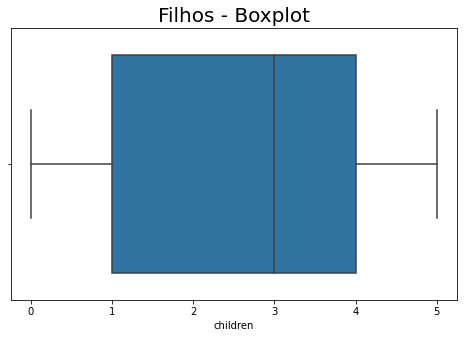

In [12]:
#Filhos
#Histograma
plt.figure(figsize=(8,5))
sns.histplot(train_data['children'], kde=True)
plt.title('Filhos', fontsize=20)
plt.show()

#Outliers - Idade
plt.figure(figsize=(8,5))
sns.boxplot(train_data['children'])
plt.title('Filhos - Boxplot', fontsize=20)
plt.show()

Masculino : 2029
Feminino : 1601


C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

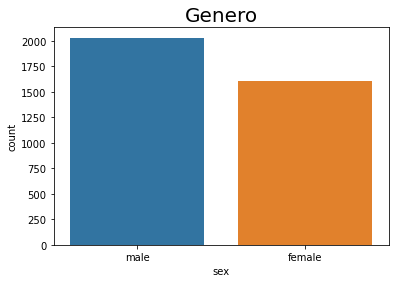

In [13]:
#Genero

#Value Counts:
print("Masculino :", train_data['sex'].value_counts()[0])
print("Feminino :", train_data['sex'].value_counts()[1])

#Visualização
plt.figure(figsize=(6,4))
sns.countplot(train_data['sex'])
plt.title('Genero', fontsize=20)
plt.show


Fumantes : 3070
Não Fumantes : 560


C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

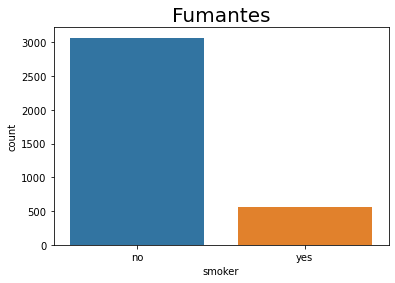

In [14]:
#Fumantes

#Value Counts:
print("Fumantes :", train_data['smoker'].value_counts()[0])
print("Não Fumantes :", train_data['smoker'].value_counts()[1])

#Visualização
plt.figure(figsize=(6,4))
sns.countplot(train_data['smoker'])
plt.title('Fumantes', fontsize=20)
plt.show

South-East : 1021
North-West : 911
South-West : 850
North-East : 848


C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

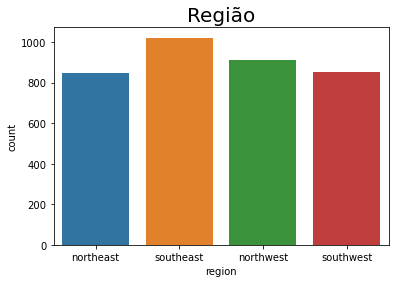

In [15]:
#Região

#Value Counts:
print("South-East :", train_data['region'].value_counts()[0])
print("North-West :", train_data['region'].value_counts()[1])
print("South-West :", train_data['region'].value_counts()[2])
print("North-East :", train_data['region'].value_counts()[3])

#Visualização
plt.figure(figsize=(6,4))
sns.countplot(train_data['region'])
plt.title('Região', fontsize=20)
plt.show

## Pré-Processamento

In [16]:
#Arredondar Idade
train_data['age'] = round(train_data['age'])
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [17]:
#OHEncoding - Transformar váriaveis em númericas

train_data = pd.get_dummies(train_data, drop_first=True)
train_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0
2,18.0,30.030000,1,1720.353700,1,0,0,1,0
3,37.0,30.676891,3,6801.437542,1,0,0,0,0
4,58.0,32.010000,1,11946.625900,1,0,0,1,0


In [18]:
#Colunas do df
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [19]:
#Arrumar colunas para melhor visualização
train_data = train_data[['age', 'sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
train_data.head()

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,1,0,21454.494239
2,18.0,1,0,30.030000,1,0,1,0,1720.353700
3,37.0,1,0,30.676891,3,0,0,0,6801.437542
4,58.0,1,0,32.010000,1,0,1,0,11946.625900


In [20]:
#Split de Dados
X = train_data.iloc[:,:-1] #todas as linhas e menos a ultima coluna 'charges' valor
y = train_data.iloc[:,-1] #valor do plano 'charges' - o que queremos prever 

In [21]:
X.head()

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0
2,18.0,1,0,30.030000,1,0,1,0
3,37.0,1,0,30.676891,3,0,0,0
4,58.0,1,0,32.010000,1,0,1,0


In [22]:
y.head()

0     3279.868550
1    21454.494239
2     1720.353700
3     6801.437542
4    11946.625900
Name: charges, dtype: float64

In [41]:
#Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Criando Metodologia de previsão

In [42]:
#importar metricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
#MP com Regressão Linear
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train) #treinamento

#Prediction
y_pred = LinearRegression.predict(X_test) #Uso

#Resultados
print(r2_score(y_test, y_pred)) #qnto mais próximo de 100% melhor
print(mean_squared_error(y_test, y_pred))

0.7482602892322038
30898859.035960782


In [47]:
#MP com Regressão Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

#Prediction
y_pred = Ridge.predict(X_test)

#Scores
print(r2_score(y_test, y_pred)) #qnto mais próximo de 100% melhor
print(mean_squared_error(y_test, y_pred))

0.7481028884319251
30918178.614604633


In [45]:
#MP com Regressão Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

#Prediction
y_pred = Lasso.predict(X_test)

#Scores
print(r2_score(y_test, y_pred)) #qnto mais próximo de 100% melhor
print(mean_squared_error(y_test, y_pred))

0.7482269824960903
30902947.148007076


In [48]:
#MP com Random Forest
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

#Prediction
y_pred = RandomForestRegressor.predict(X_test)

#Scores
print(r2_score(y_test, y_pred)) #qnto mais próximo de 100% melhor
print(mean_squared_error(y_test, y_pred))

0.9089063645660437
11180951.117177056


# Salvando Maquina preditiva para Deploy

In [50]:
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))